In [1]:
pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 8.1 MB/s 
     |████████████████████████████████| 588.3 MB 16 kB/s 
     |████████████████████████████████| 6.0 MB 44.9 MB/s 
     |████████████████████████████████| 439 kB 57.3 MB/s 
     |████████████████████████████████| 1.7 MB 49.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.1

In [2]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [1]:
import tensorflow_hub as hub

import pandas as pd

import tensorflow_text as text

import tensorflow as tf

import numpy as np

In [2]:
!gdown 1g0jBWp3HZ1QhYDnNynh0A_jUdhmagixW
!gdown 1-0q0JcBvsIcwwHVjWQ41a2yY_4XhM20u
!gdown 1JTq7EveehwEAw3SDNZsJLgVPE-dD0CXJ
!gdown 1-1jWJUqh0z5RThpVgEbfMmnc-xvapoxS
!gdown 1-9ddaARmlwwx1-5obKaTKs8Tf2RTurLt
!gdown 1gK5pdvWcjSvCjf5jDYLaa9yHMoe-ctl-

Downloading...
From: https://drive.google.com/uc?id=1g0jBWp3HZ1QhYDnNynh0A_jUdhmagixW
To: c:\Users\KHOOSHRIN\Documents\BITS PILANI HYDERABAD CAMPUS\Third Year\First Semester\CS F429 - Natural Language Processing (NLP)\Project\NLP_train_with_bert_embeddings.csv

  0%|          | 0.00/348M [00:00<?, ?B/s]
  0%|          | 524k/348M [00:00<01:56, 2.98MB/s]
  0%|          | 1.57M/348M [00:00<01:02, 5.55MB/s]
  1%|          | 3.15M/348M [00:00<00:37, 9.12MB/s]
  2%|▏         | 5.77M/348M [00:00<00:25, 13.2MB/s]
  2%|▏         | 7.34M/348M [00:00<00:32, 10.4MB/s]
  3%|▎         | 10.5M/348M [00:00<00:22, 15.2MB/s]
  4%|▍         | 13.6M/348M [00:00<00:17, 19.3MB/s]
  5%|▍         | 17.3M/348M [00:01<00:14, 23.1MB/s]
  6%|▌         | 20.4M/348M [00:01<00:13, 24.8MB/s]
  7%|▋         | 23.6M/348M [00:01<00:12, 25.4MB/s]
  8%|▊         | 27.3M/348M [00:01<00:11, 27.2MB/s]
  9%|▉         | 31.5M/348M [00:01<00:10, 29.0MB/s]
 10%|▉         | 34.6M/348M [00:01<00:12, 25.3MB/s]
 11%|█         | 37.

In [3]:
train = pd.read_csv("NLP_train_with_bert_embeddings.csv")
validate = pd.read_csv("NLP_validate_with_bert_embeddings.csv")
test = pd.read_csv("NLP_test_with_bert_embeddings.csv")
NERTrain = pd.read_csv("NER_train.csv")
NERTest = pd.read_csv("NER_test.csv")
NERVal = pd.read_csv("NER_validate.csv")

In [4]:
X_train = train['bert']
Y_train = train['verdict']

In [5]:
validate['verdict'] = validate['verdict'].apply(lambda x:1 if x=='spam' else 0)
test['verdict'] = test['verdict'].apply(lambda x:1 if x=='spam' else 0)

In [5]:
NERTrain

,Unnamed: 0,DATE,CARDINAL,ORG,QUANTITY,PERSON,PERCENT,TIME,MONEY,GPE,ORDINAL,NORP,PRODUCT,EVENT,FAC,LOC,LANGUAGE,LAW,WORK_OF_ART
0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,29.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34549,34549,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34550,34550,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34551,34551,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34552,34552,2.0,7.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
NER_Train = NERTrain.iloc[:,1:].to_numpy()

In [7]:
NER_Train

array([[1., 1., 0., ..., 0., 0., 0.],
       [2., 2., 2., ..., 0., 0., 0.],
       [3., 2., 3., ..., 0., 0., 0.],
       ...,
       [1., 2., 0., ..., 0., 0., 0.],
       [2., 7., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [7]:
NER_Test = NERTest.iloc[:,1:].to_numpy()

In [ ]:
# downloading preprocessing files and model
bert_preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [ ]:
text_input = tf.keras.layers.Input(shape = (), dtype = tf.string, name = 'Inputs')
preprocessed_text = bert_preprocessor(text_input)
embeed = bert_encoder(preprocessed_text)
dropout = tf.keras.layers.Dropout(0.1, name = 'Dropout')(embeed['pooled_output'])
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'Dense')(dropout)

In [ ]:
# creating final model
model = tf.keras.Model(inputs = [text_input], outputs = [outputs])

In [ ]:
Metrics = [tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
           tf.keras.metrics.Precision(name = 'precision'),
           tf.keras.metrics.Recall(name = 'recall')
           ]

In [ ]:
# compiling our model
model.compile(optimizer ='adam',
               loss = 'binary_crossentropy',
               metrics = Metrics)

In [12]:
X_test=test['bert']
y_test=test['verdict']

In [8]:
float_train_embeddings=[]
index = 0
for each_embedding in X_train:
  each_element=each_embedding.split()
  each_element[0]=each_element[0][1:]
  if len(each_element[0]) == 0:
    each_element.remove('')
  each_element[len(each_element)-1]=each_element[len(each_element)-1][0:len(each_element[len(each_element)-1])-1]
  float_each_element=[float(i) for i in each_element]
  for cnt_ner in NER_Train[index]:
    float_each_element.append(cnt_ner)
  float_train_embeddings.append(float_each_element)
  index += 1

In [9]:
X_train_final = np.array(float_train_embeddings)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(402,)),
    tf.keras.layers.Dense(256, activation = 'sigmoid'),
    tf.keras.layers.Dense(128, activation = 'sigmoid'),
    tf.keras.layers.Dense(64, activation = 'sigmoid'),
    tf.keras.layers.Dense(32, activation = 'sigmoid'),
    tf.keras.layers.Dense(16, activation = 'sigmoid'),
    tf.keras.layers.Dense(8, activation = 'sigmoid'),
    tf.keras.layers.Dense(4, activation = 'sigmoid'),
    tf.keras.layers.Dense(2, activation = 'softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_final, Y_train, epochs=10)

Epoch 1/10
1080/1080 [==============================] - 2s 2ms/step - loss: 0.3274 - accuracy: 0.8821
Epoch 2/10
1080/1080 [==============================] - 2s 2ms/step - loss: 0.1039 - accuracy: 0.9744
Epoch 3/10
1080/1080 [==============================] - 2s 2ms/step - loss: 0.0735 - accuracy: 0.9783
Epoch 4/10
1080/1080 [==============================] - 2s 2ms/step - loss: 0.0639 - accuracy: 0.9795
Epoch 5/10
1080/1080 [==============================] - 2s 2ms/step - loss: 0.0568 - accuracy: 0.9809
Epoch 6/10
1080/1080 [==============================] - 2s 2ms/step - loss: 0.0535 - accuracy: 0.9822
Epoch 7/10
1080/1080 [==============================] - 2s 2ms/step - loss: 0.0503 - accuracy: 0.9831
Epoch 8/10
1080/1080 [==============================] - 2s 2ms/step - loss: 0.0475 - accuracy: 0.9842
Epoch 9/10
1080/1080 [==============================] - 2s 2ms/step - loss: 0.0444 - accuracy: 0.9840
Epoch 10/10
1080/1080 [==============================] - 2s 2ms/step - loss: 0.042

In [13]:
float_train_embeddings=[]
index = 0
for each_embedding in X_test:
  each_element=each_embedding.split()
  each_element[0]=each_element[0][1:]
  if len(each_element[0]) == 0:
    each_element.remove('')
  each_element[len(each_element)-1]=each_element[len(each_element)-1][0:len(each_element[len(each_element)-1])-1]
  float_each_element=[float(i) for i in each_element]
  for cnt_ner in NER_Test[index]:
    float_each_element.append(cnt_ner)
  float_train_embeddings.append(float_each_element)
  index += 1

In [14]:
X_test_final = np.array(float_train_embeddings)

In [15]:
model.evaluate(X_test_final,y_test)

168/168 [==============================] - 0s 1ms/step - loss: 0.0567 - accuracy: 0.9807


[0.05666358396410942, 0.9807440638542175]

In [16]:
y_pred = model.predict(X_test_final)

168/168 [==============================] - 0s 1ms/step


In [17]:
y_pred=y_pred.flatten()

In [18]:
final_y_pred=[]
ind = 0
for each_y_pred in y_pred:
    if ind%2==1 and each_y_pred<0.5:
        final_y_pred.append(0)
    elif ind%2==1:
        final_y_pred.append(1)
    ind += 1

In [19]:
from sklearn.metrics import confusion_matrix , classification_report

# creating confusion matrix 

cm = confusion_matrix(y_test,final_y_pred)

cm

array([[2451,   48],
       [  55, 2795]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual')

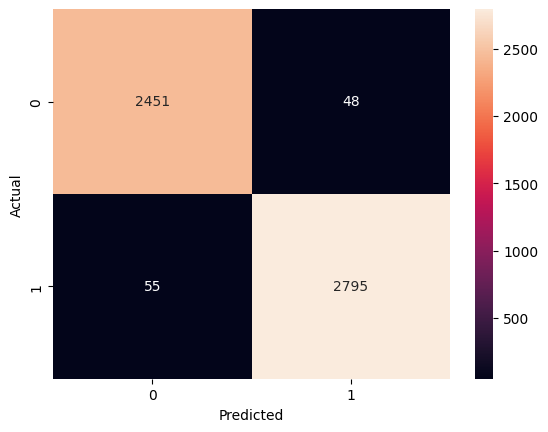

In [20]:
# plotting as a graph - importing seaborn
import seaborn as sns
from matplotlib import pyplot as plt
# creating a graph out of confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')